In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
train_data = pd.read_excel(r"Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.shape

(10683, 11)

In [7]:
test_data = pd.read_excel(r"Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
test_data.shape

(2671, 10)

In [9]:
train_data['Journey_Day'] = pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [10]:
train_data['Journey_Month'] = pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
train_data.drop(['Date_of_Journey'],axis = 1,inplace=True)

In [13]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
duration = train_data['Duration']

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

<ipython-input-14-16119ec59b9e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[i] = duration[i].strip() + " 0m"
<ipython-input-14-16119ec59b9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[i] = "0h " + duration[i]


In [15]:
train_data['Duration_Hours'] = duration_hours
train_data['Duration_Mins'] = duration_mins

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 0m,2 stops,No info,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4,45


In [17]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,4,45


In [19]:
train_data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [20]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [21]:
train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0.0,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2.0,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2.0,No info,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1.0,No info,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1.0,No info,13302,1,3,4,45


In [22]:
train_data['Arrival_Hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour

In [23]:
train_data['Arrival Minute'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0.0,No info,3897,24,3,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2.0,No info,7662,1,5,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2.0,No info,13882,9,6,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1.0,No info,6218,12,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1.0,No info,13302,1,3,4,45,21,35


In [25]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,0.0,No info,3897,24,3,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2.0,No info,7662,1,5,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2.0,No info,13882,9,6,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1.0,No info,6218,12,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1.0,No info,13302,1,3,4,45,21,35


In [27]:
train_data['Departure Hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Departure Minute'] = pd.to_datetime(train_data.Dep_Time).dt.minute



In [28]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,0.0,No info,3897,24,3,2,50,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2.0,No info,7662,1,5,7,25,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2.0,No info,13882,9,6,19,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1.0,No info,6218,12,5,5,25,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1.0,No info,13302,1,3,4,45,21,35,16,50


In [29]:
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2,50,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,7,25,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,19,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,5,25,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,4,45,21,35,16,50


In [31]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

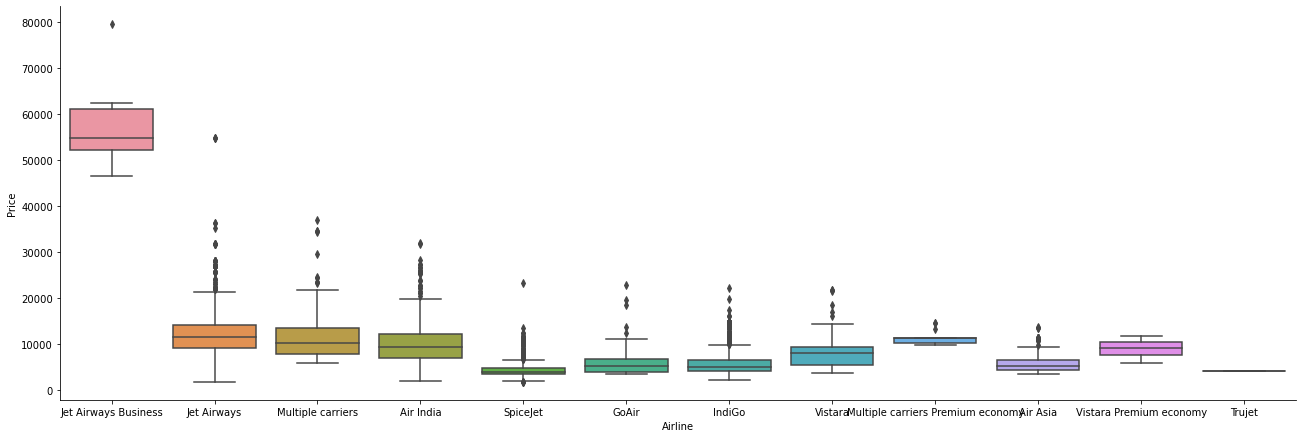

In [32]:
sns.catplot(y="Price",x="Airline",data = train_data.sort_values("Price",ascending=False),kind="box",height=6,aspect=3)
plt.show()

In [33]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [34]:
train_data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

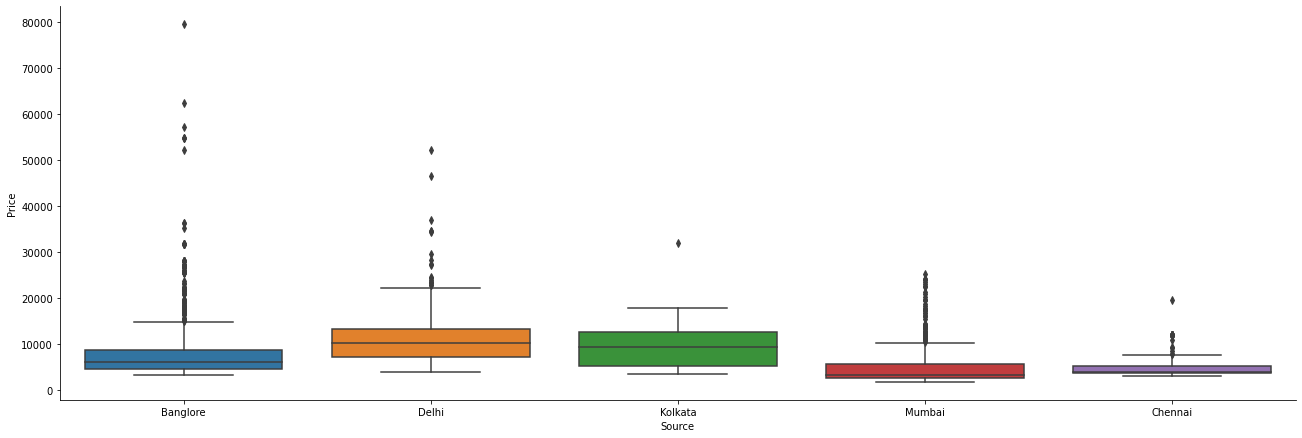

In [35]:
sns.catplot(y="Price",x="Source",data = train_data.sort_values("Price",ascending=False),kind="box",height=6,aspect=3)
plt.show()

In [36]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [37]:
train_data.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

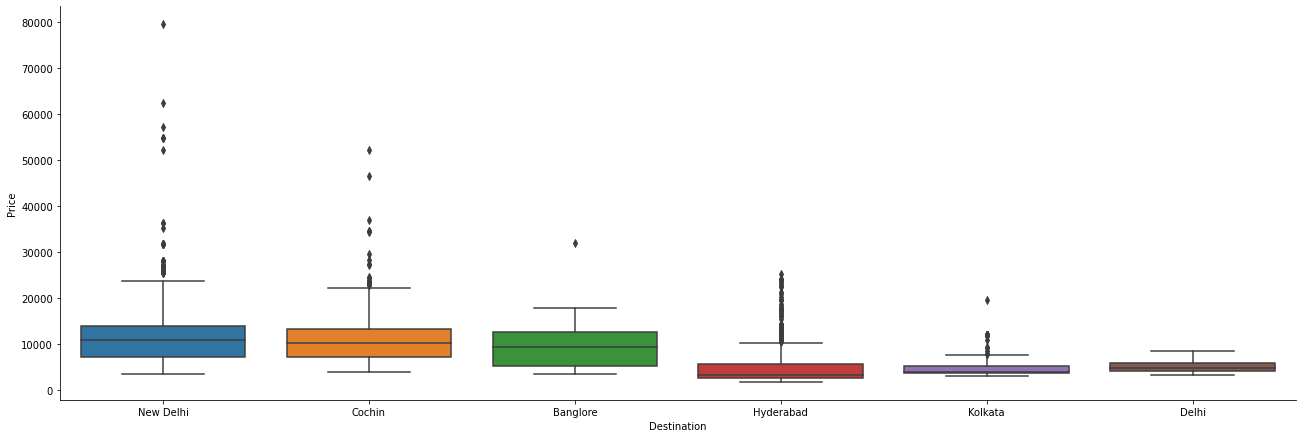

In [38]:
sns.catplot(y="Price",x="Destination",data = train_data.sort_values("Price",ascending=False),kind="box",height=6,aspect=3)
plt.show()

In [39]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [41]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute,Departure Hour,Departure Minute
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2,50,1,10,22,20
1,Air India,Kolkata,Banglore,2.0,7662,1,5,7,25,13,15,5,50
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,19,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,5,25,23,30,18,5
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,4,45,21,35,16,50


In [42]:
train_data = pd.concat([train_data,Airline,Source,Destination],axis=1)

In [43]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2,50,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,1,5,7,25,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,19,0,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,5,25,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,4,45,21,...,0,0,0,0,0,0,0,0,0,1


In [44]:
train_data.shape

(10683, 33)

In [45]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
test_data['Journey_Day'] = pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data['Journey_Month'] = pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [47]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [48]:
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [49]:
duration = test_data['Duration']

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

<ipython-input-49-560504bf7e99>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[i] = duration[i].strip() + " 0m"
<ipython-input-49-560504bf7e99>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[i] = "0h " + duration[i]


In [50]:
test_data['Duration_Hours'] = duration_hours
test_data['Duration_Mins'] = duration_mins

In [51]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h 0m,1 stop,No info,12,5,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h 0m,1 stop,No info,21,5,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2,50


In [52]:
test_data.drop(['Duration'],axis=1,inplace=True)

In [53]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,1 stop,No info,6,6,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,1 stop,No info,12,5,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1 stop,In-flight meal not included,21,5,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,1 stop,No info,21,5,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,non-stop,No info,24,6,2,50


In [54]:
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,1,No info,6,6,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,1,No info,12,5,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1,In-flight meal not included,21,5,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,1,No info,21,5,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,0,No info,24,6,2,50


In [55]:
test_data['Arrival_Hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival Minute'] = pd.to_datetime(test_data.Arrival_Time).dt.minute

In [56]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,1,No info,6,6,10,55,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,1,No info,12,5,4,0,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1,In-flight meal not included,21,5,23,45,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,1,No info,21,5,13,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,0,No info,24,6,2,50,2,45


In [57]:
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [58]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,1,No info,6,6,10,55,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,1,No info,12,5,4,0,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,1,In-flight meal not included,21,5,23,45,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,1,No info,21,5,13,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,0,No info,24,6,2,50,2,45


In [59]:
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [60]:
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [61]:
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [62]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [63]:
test_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute
0,Jet Airways,Delhi,Cochin,17:30,1,6,6,10,55,4,25
1,IndiGo,Kolkata,Banglore,06:20,1,12,5,4,0,10,20
2,Jet Airways,Delhi,Cochin,19:15,1,21,5,23,45,19,0
3,Multiple carriers,Delhi,Cochin,08:00,1,21,5,13,0,21,0
4,Air Asia,Banglore,Delhi,23:55,0,24,6,2,50,2,45


In [64]:
test_data['Departure Hour'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Departure Minute'] = pd.to_datetime(test_data.Dep_Time).dt.minute

In [65]:
test_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute,Departure Hour,Departure Minute
0,Jet Airways,Delhi,Cochin,17:30,1,6,6,10,55,4,25,17,30
1,IndiGo,Kolkata,Banglore,06:20,1,12,5,4,0,10,20,6,20
2,Jet Airways,Delhi,Cochin,19:15,1,21,5,23,45,19,0,19,15
3,Multiple carriers,Delhi,Cochin,08:00,1,21,5,13,0,21,0,8,0
4,Air Asia,Banglore,Delhi,23:55,0,24,6,2,50,2,45,23,55


In [66]:
test_data = pd.concat([test_data,Airline,Source,Destination],axis=1)

In [67]:
test_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,17:30,1,6,6,10,55,4,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,06:20,1,12,5,4,0,10,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19:15,1,21,5,23,45,19,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,08:00,1,21,5,13,0,21,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,23:55,0,24,6,2,50,2,...,0,0,0,0,0,0,1,0,0,0


In [68]:
test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [69]:
test_data.drop(['Dep_Time'],axis=1,inplace=True)

In [70]:
test_data.head()

,Total_Stops,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute,Departure Hour,Departure Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,10,55,4,25,17,30,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,4,0,10,20,6,20,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,23,45,19,0,19,15,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,13,0,21,0,8,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,50,2,45,23,55,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2,50,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,1,5,7,25,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,19,0,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,5,25,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,4,45,21,...,0,0,0,0,0,0,0,0,0,1


In [71]:
test_data.dropna(inplace=True)

In [72]:
Y = train_data['Price']
train_data.drop(['Price'],axis=1,inplace=True)

In [73]:
train_data

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,24,3,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,1,5,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,9,6,19,0,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,12,5,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,1,3,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,9,4,2,30,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0.0,27,4,2,35,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0.0,27,4,3,0,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0.0,1,3,2,40,14,10,...,0,0,0,0,0,0,0,0,0,1


In [76]:
X = train_data
X.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [77]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Arrival_Hour,Arrival Minute,Departure Hour,Departure Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,2,50,1,10,22,20,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,7,25,13,15,5,50,1,...,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,19,0,4,25,9,25,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,5,25,23,30,18,5,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,4,45,21,35,16,50,0,...,0,0,0,0,0,0,0,0,0,1


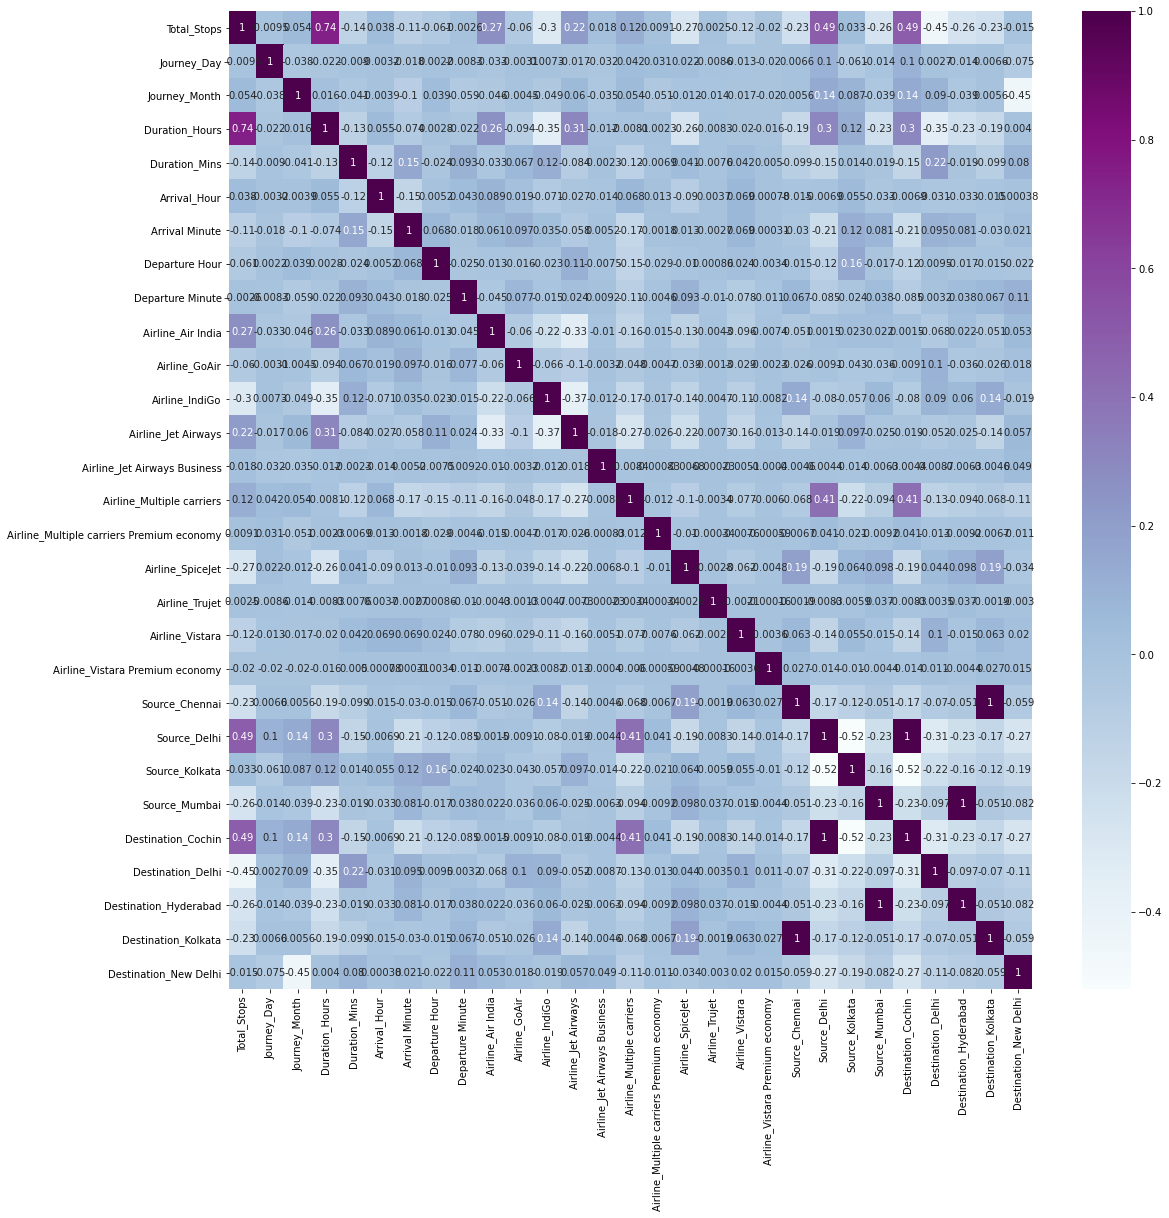

In [78]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="BuPu")
plt.show()

In [86]:
del Y[9039]
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

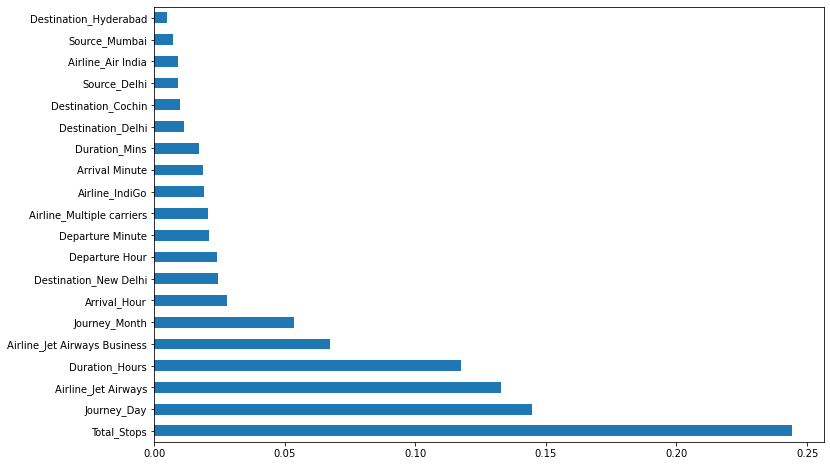

In [87]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=None,shuffle=True)

In [89]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred

array([13001.0055    , 15718.9625    ,  9305.42      , ...,
        6738.68      , 11307.25116667, 13859.831     ])

In [92]:
model.score(X_test,Y_test)

0.8015711194733142

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

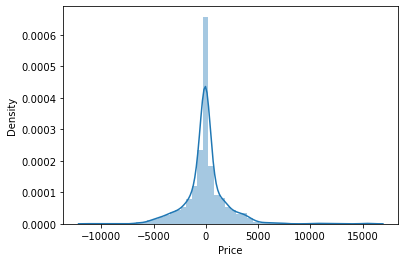

In [93]:
sns.distplot(Y_test-y_pred)
plt.plot()

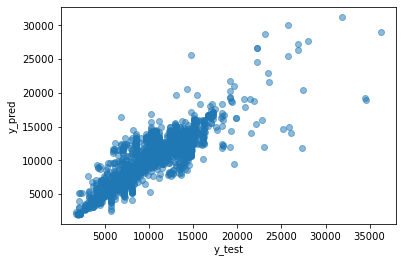

In [94]:
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [95]:
from sklearn import metrics

In [96]:
print("MAE : ",metrics.mean_absolute_error(Y_test,y_pred))
print("MSE : ",metrics.mean_squared_error(Y_test,y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE :  1190.197697112966
MSE :  3839881.6403651875
RMSE :  1959.5615939197185


In [97]:
metrics.r2_score(Y_test,y_pred)

0.8015711194733142

In [ ]:
## HYPERPARAMETER TUNING

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
#Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop = 1200, num = 12)]
#No of features to consider at everysplit
max_features = ['auto','sqrt']
#max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#Min number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [101]:
random_grid = [{
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}]

In [102]:
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter = 10,cv = 5,verbose=2, random_state=42,n_jobs=1)

In [103]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  11.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions=[{'max_depth': [5, 10, 15, 20, 25, 30],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 2, 5, 10],
                                         'min_samples_split': [2, 5, 10, 15,
                                                               100],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500, 600, 700, 800,
                                                          900, 1000, 1100,
                                                          1200]}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [105]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [106]:
prediction = rf_random.predict(X_test)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


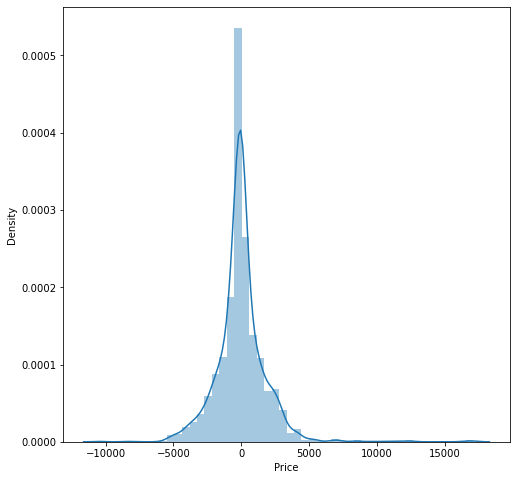

In [107]:
plt.figure(figsize=(8,8))
sns.distplot(Y_test - prediction)
plt.show()

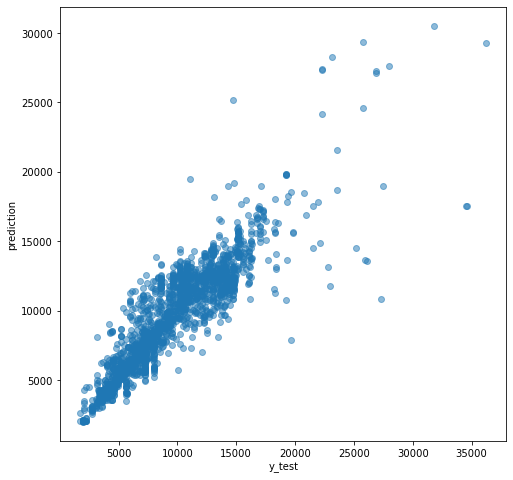

In [110]:
plt.figure(figsize=(8,8))
plt.scatter(Y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [112]:
print("MAE:",metrics.mean_absolute_error(Y_test,prediction))
print("MSE:",metrics.mean_squared_error(Y_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE: 1170.009505356177
MSE: 3475530.3365234504
RMSE: 1864.2774301384036


In [113]:
import pickle
file = open("flight_fare.pkl","wb")
pickle.dump(model,file)

In [114]:
model = open("flight_fare.pkl","rb")
forest = pickle.load(model)

In [115]:
y_prediction = forest.predict(X_test)

In [116]:
metrics.r2_score(y_prediction,Y_test)

0.7674121139570929